# 1. Titanic

## 1-1. 문제 정의 및 가설 수립
* 나이가 어릴수록 생존률이 높을 것이다.
* 여자의 생존률이 남자보다 높을 것이다.
* 높은 객실 등급에 탄 사람들이 낮은 객실 등급보다 생존률이 높을 것이다".

## 1-2. 데이터 가져오기
* kaggle 데이터 (https://www.kaggle.com/datasets)
* 공공 데이터 포럼 (https://www.data.go.kr/)
* 서울 열린데이터 광장 (https://data.seoul.go.kr/)
* 통계청 (https://kosis.kr/)
* 기상청 (https://data.kma.go.kr/)

In [2]:
!kaggle datasets download -d heptapod/titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!tar -xvf titanic.zip

x gender_submission.csv
x test.csv
x train.csv


## 1-3. 데이터 로드하기

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
# 한글 컬럼명 바꾸기
# 생존여부 (0 : 사망, 1 : 생존)
df.columns = ['id', '생존여부', '객실등급', '이름', '성별', '나이', '형제배우자수', '부모아이수', '티켓번호', '수하물번호', '선착장', '안녕']
df.head()

,id,생존여부,객실등급,이름,성별,나이,형제배우자수,부모아이수,티켓번호,수하물번호,선착장,안녕
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1-4. 데이터 살펴보기

In [11]:
df.shape

(891, 12)

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df.객실등급.value_counts()

3    491
1    216
2    184
Name: 객실등급, dtype: int64

In [24]:
df.선착장.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
C22 C26        3
              ..
C30            1
D30            1
B78            1
F E69          1
A23            1
Name: 선착장, Length: 147, dtype: int64

In [25]:
# 불필요한 컬럼 삭제하기
# id, 이름, 티켓번호, 수하물번호
df.head(['id', '이름', '티켓번호', '수하물번호'], axis=1, inplace=True)
df.head()

TypeError: head() got an unexpected keyword argument 'axis'

## 1-5. EDA (탐색적 데이터 분석)

### 1. 생존자수 보기


In [26]:
df.생존여부.value_counts()

0    549
1    342
Name: 생존여부, dtype: int64

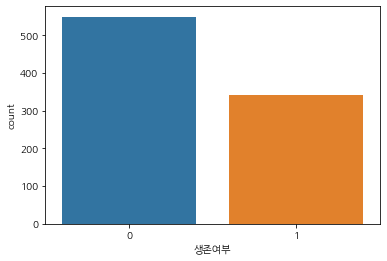

In [27]:
# Count Plot
sns.countplot(x = '생존여부', data=df)
plt.show()

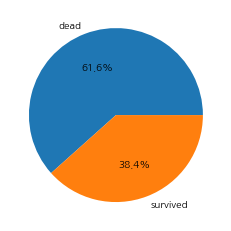

In [28]:
# Pie Chart
plt.pie(df.생존여부.value_counts(), labels=['dead', 'survived'], autopct='%.1f%%')
plt.show()

# 2. 나이별 데이터 분석

In [29]:
df.나이.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: 나이, dtype: float64

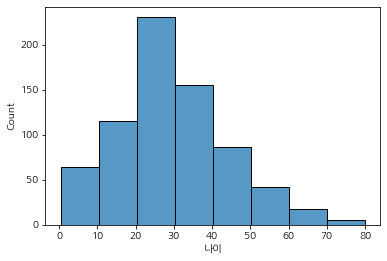

In [30]:
# 나이 분포도
sns.histplot(data=df.나이, bins=8)
plt.show()

In [31]:
df.loc[df.나이 < 10].count()

id        62
생존여부      62
객실등급      62
이름        62
성별        62
나이        62
형제배우자수    62
부모아이수     62
티켓번호      62
수하물번호     62
선착장       10
안녕        62
dtype: int64

In [32]:
df.loc[df.나이 < 10, '생존여부'].sum()

38

In [33]:
38/62

0.6129032258064516

In [34]:
df.loc[df.나이 < 10, '생존여부'].mean()

0.6129032258064516

In [35]:
survival_rate = []
for i in range(10, 91, 10): #10~90
    survival_rate.append(df.loc[(df.나이 >= i-10) & (df.나이 < i), '생존여부'].mean())
survival_rate

[0.6129032258064516,
 0.4019607843137255,
 0.35,
 0.437125748502994,
 0.38202247191011235,
 0.4166666666666667,
 0.3157894736842105,
 0.0,
 1.0]

<AxesSubplot:>

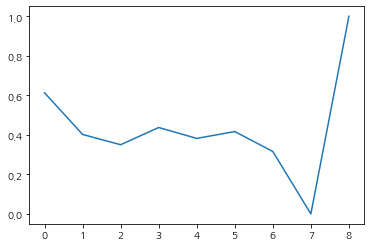

In [36]:
sns.lineplot(data=survival_rate)

##### 나이가 어릴수록 생존율이 높다는 가설은 완전히 맞는다고 할 수 없다.

### 3. 성별에 따른 데이터 분석

In [37]:
df.groupby('성별')['생존여부'].count().to_frame()

,생존여부
성별,
female,314
male,577


In [38]:
df.groupby('성별')['생존여부'].sum().to_frame()

,생존여부
성별,
female,233
male,109


<AxesSubplot:xlabel='성별', ylabel='count'>

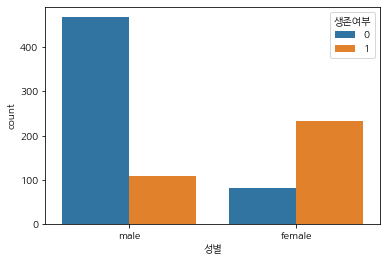

In [39]:
sns.countplot(x='성별', hue='생존여부', data=df)

In [40]:
df.groupby('성별')['생존여부'].mean().to_frame()

,생존여부
성별,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='성별', ylabel='생존여부'>

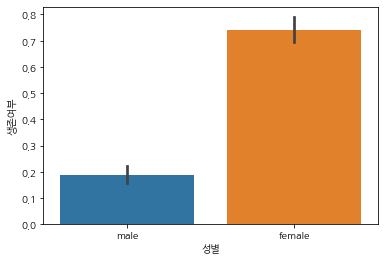

In [41]:
sns.barplot(x='성별', y='생존여부', data=df)

##### 여성의 생존율이 남성의 생존율보다 높다는 가설은 성립한다.

### 4 : 객실등급별 데이터 분석

In [42]:
df.groupby('객실등급')['생존여부'].count().to_frame()

,생존여부
객실등급,
1,216
2,184
3,491


<AxesSubplot:xlabel='객실등급', ylabel='count'>

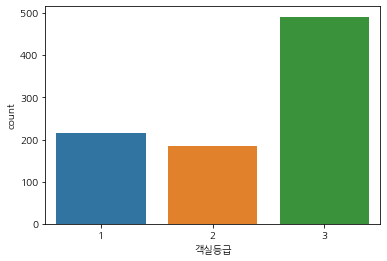

In [43]:
sns.countplot(x='객실등급', data=df)

In [44]:
df.groupby('객실등급')['생존여부'].sum().to_frame()

,생존여부
객실등급,
1,136
2,87
3,119


<AxesSubplot:xlabel='객실등급', ylabel='count'>

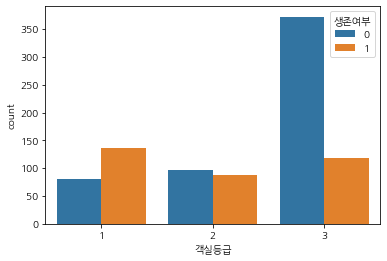

In [45]:
sns.countplot(x='객실등급', hue='생존여부', data=df)

In [46]:
# 객실등급별 생존율
df.groupby('객실등급')['생존여부'].mean().to_frame().reset_index()

,객실등급,생존여부
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [47]:
sns.barplot(x='객실등급', y='생존여부', data=df2)
plt.ylabel('생존율')

NameError: name 'df2' is not defined

In [ ]:
sns.barplot(x='객실등급', y='생존여부', hue='성별', data=df2)
plt.ylabel('생존율')

1등급 객실의 생존율이 3등급 객실의 생존율보다 높다는 가설은 성립한다.

## 5. 상관관계 분석

In [48]:
df.corr()

,id,생존여부,객실등급,나이,형제배우자수,부모아이수,수하물번호
id,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
생존여부,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
객실등급,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
나이,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
형제배우자수,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
부모아이수,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
수하물번호,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

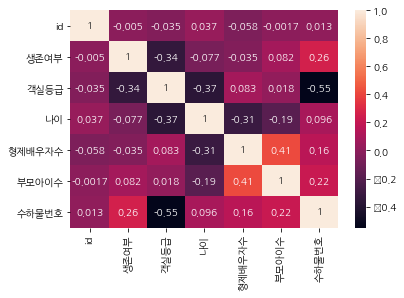

In [49]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

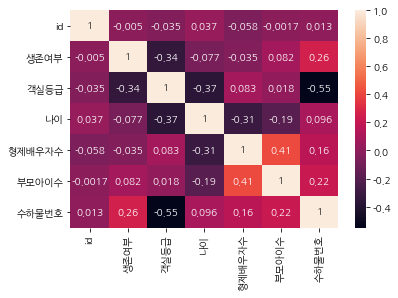

In [50]:
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(df.corr(), annot=True)

In [51]:
map = {'male' : 0, 'female' : 1}
df['성별코드'] = df['성별'].map(map)
df.head()

,id,생존여부,객실등급,이름,성별,나이,형제배우자수,부모아이수,티켓번호,수하물번호,선착장,안녕,성별코드
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


<AxesSubplot:>

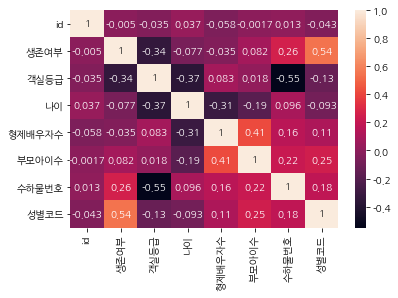

In [52]:
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(df.corr(), annot=True)